In [1]:
import numpy as np
import matplotlib.pyplot as plt

## EAF inputs
* rm1 = pig iron, m = 1036kg
* rm2 = flux, m = 28kg
* rm3 = refractories, m = 2.6kg
* rm4 = coke, m = 21kg
* rm5 = air, m = 162kg
* rm6 = methane, m = 4kg
* rm7 = oxygen, m = 42kg
* rm8 = electrodes, m = 3.05kg
* compositions = Fe,Fe3C,FeO,Fe2O3,Al2O3,SiO2,CaO,CaCO3,MgO,Al,Si,C,S,H2O,N2,CH4,O2,Ca

In [3]:
rm1 = np.array([0.8423,0.0198,0.0706,0,0.0323,0.0323,0,0,0,0,0,0,0.0027,0,0,0,0,0])
rm2 = np.array([0,0,0,0.00108,0.01093,0.01797,0.5081,0.3505,0.1114,0,0,0,0,0,0,0,0,0])
rm3 = np.array([0,0,0,0.006,0.032,0.044,0.015,0,0.903,0,0,0,0,0,0,0,0,0])
rm4 = np.array([0,0,0,0,0.03,0.04,0,0,0,0,0,0.885,0.025,0.02,0,0,0,0])
rm5 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.767,0,0.233,0])
rm6 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0])
rm7 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0])
rm8 = np.array([0.0015,0,0,0,0.005,0.005,0,0,0,0.0015,0.0015,0.993,0,0,0,0,0,0.0015])

In [4]:
mt = np.array([1036,28,2.6,21,150,4,42,3.05])
mft = mt/np.sum(mt)
m_DRI = 1.036 #tons
### DRI feed => mDRI = 27.16 tons
m_EAFt = m_DRI/mft[0]
m_EAFin = (mft*(m_EAFt))*1000
print(m_EAFin)
print(np.sum(m_EAFin))
m_rm1 = m_EAFin[0]*rm1
m_rm2 = m_EAFin[1]*rm2
m_rm3 = m_EAFin[2]*rm3
m_rm4 = m_EAFin[3]*rm4
m_rm5 = m_EAFin[4]*rm5
m_rm6 = m_EAFin[5]*rm6
m_rm7 = m_EAFin[6]*rm7
m_rm8 = m_EAFin[7]*rm8
RMM = np.matrix([m_rm1,m_rm2,m_rm3,m_rm4,m_rm5,m_rm6,m_rm7,m_rm8])
print(np.sum(RMM[:, 0]))

[1036.     28.      2.6    21.    150.      4.     42.      3.05]
1286.6499999999999
872.6273750000001


### Elemental Feed

In [6]:
Fe_in = np.sum(RMM[:, 0])
Fe3C_in = np.sum(RMM[:, 1])
FeO_in = np.sum(RMM[:, 2])
Fe2O3_in = np.sum(RMM[:, 3])
Al2O3_in = np.sum(RMM[:, 4])
SiO2_in = np.sum(RMM[:, 5])
CaO_in = np.sum(RMM[:, 6])
CaCO3_in = np.sum(RMM[:, 7])
MgO_in = np.sum(RMM[:, 8])
Al_in = np.sum(RMM[:, 9])
Si_in = np.sum(RMM[:, 10])
C_in = np.sum(RMM[:, 11])
S_in = np.sum(RMM[:, 12])
H2O_in = np.sum(RMM[:, 13])
N2_in = np.sum(RMM[:, 14])
CH4_in = np.sum(RMM[:, 15])
O2_in = np.sum(RMM[:, 16])
Ca_in = np.sum(RMM[:, 17])

## Reactions in the EAF

* Reaction 1:  2Fe + 1.5O2 = Fe2O3
* Reaction 2:   Fe + 0.5O2 = FeO
* Reaction 3:  4FeO + O2 = Fe2O3
* Reaction 4:   Si + O2 = SiO2
* Reaction 5:   2Al +1.5O2 = Al2O3
* Reaction 6:   Ca + 0.5O2 = CaO
* Reaction 7:   CaCO3 = CaO + CO2
* Reaction 8:  C + 0.5O2 = CO
* Reaction 9:  CO + 0.5O2 = CO2
* Reaction 10: CH4 + 2O2 = CO2 + 2H2O
* Reaction 11: CaO + S = CaS + 0.5O2

In [8]:
e_val = np.array([0.92/99.59,1.2/99.59,1,66.4/73.98,1,1,1,82/86.77,1,1,1])

### Reaction1:
Fe_con1 = e_val[0]*Fe_in
O2_con1 = (Fe_con1/55.85)*(1.5/2)*(32)
Fe2O3_prod1 = (Fe_con1/55.85)*(1/2)*(159.69)
### Reaction2:
Fe_con2 = e_val[1]*Fe_in
O2_con2 = (Fe_con2/55.85)*(0.5/1)*(32)
FeO_prod2 = (Fe_con2/55.85)*(1/1)*(71.85)
### Reaction3:
FeO_con3 = e_val[2]*FeO_in
O2_con3 = (FeO_con3/71.85)*(1/4)*(32)
Fe2O3_prod3 = (FeO_con3/71.85)*(2/4)*(159.69)
### Reaction4: 
Si_con4 = e_val[3]*Si_in
O2_con4 = (Si_con4/28)*(32)
SiO2_prod4 = (Si_con4/28)*(60.09)
### Reaction5:
Al_con5 = e_val[4]*Al_in
O2_con5 = (Al_con5/26.98)*(1.5/2)*(32)
Al2O3_prod5 = (Al_con5/26.98)*(1.5/2)*(101.96)
### Reaction6:
Ca_con6 = e_val[5]*Ca_in
O2_con6 = (Ca_con6/40.08)*(1/2)*(32)
CaO_prod6 = (Ca_con6/40.08)*(2/2)*(56.08)
### Reaction7:
CaCO3_con7 = e_val[6]*CaCO3_in
CaO_prod7 = (CaCO3_con7/100.09)*(1/1)*(56.08)
CO2_prod7 = (CaCO3_con7/100.09)*(1/1)*(44)
### Reaction8:
C_con8 = e_val[7]*C_in
O2_con8 = (C_con8/12)*(0.5/1)*(32)
CO_prod8 = (C_con8/12)*(1/1)*(28)
### Reaction10:
CH4_con10 = e_val[9]*CH4_in
O2_con10 = (CH4_con10/16)*(2/1)*(32)
CO2_prod10 = (CH4_con10/16)*(1/1)*(44)
H2O_prod10 = (CH4_con10/16)*(2/1)*(18)
### Reaction11:
S_con11 = e_val[10]*S_in
CaO_con11 = (S_con11/32)*(56.08)
CaS_prod11 = (S_con11/32)*(72.14)
O2_prod11 = (S_con11/32)*(1/2)*(32)
### O2 balance:
O2_conarr = np.array([O2_con1,O2_con2,O2_con3,O2_con4,O2_con5,O2_con6,O2_con8,O2_con10])
O2_con = np.sum(O2_conarr)
O2_bal = O2_in+ O2_prod11 - O2_con 
### Reaction9:
CO_con9 = (O2_bal/32)*(1/0.5)*(28)
CO2_prod9 = (O2_bal/32)*(1/0.5)*(44)

## Flue Gas Composition

In [10]:
FG_N2 = N2_in
FG_CO = CO_prod8 - CO_con9
FG_CO2 = CO2_prod7 + CO2_prod9 + CO2_prod10
FG_H2O = H2O_in + H2O_prod10
FlueGas = np.array([FG_N2,FG_CO,FG_CO2,FG_H2O])
print(FlueGas, np.sum(FlueGas))
print('Fraction of the compositions = ', FlueGas/np.sum(FlueGas))

[115.05        11.35329674  72.36682585   9.42      ] 208.1901225978168
Fraction of the compositions =  [0.55261988 0.05453331 0.34759971 0.0452471 ]


## Liquid Steel Composition

In [90]:
ls_val = np.array([96.9/99.59,1,7.5/73.98,3.4/86.77])
LS_Fe = ls_val[0]*Fe_in
LS_Fe3C = ls_val[1]*Fe3C_in
LS_Si = ls_val[2]*Si_in
LS_C = ls_val[3]*C_in
Liquid_Steel = np.array([LS_Fe,LS_Fe3C,LS_Si,LS_C])
print(Liquid_Steel, np.sum(Liquid_Steel))
print('Fraction of the compositions = ', Liquid_Steel/np.sum(Liquid_Steel))

[8.49057060e+02 2.05128000e+01 4.63807786e-04 8.46910338e-01] 870.4172344677819
Fraction of the compositions =  [9.75459845e-01 2.35666290e-02 5.32856850e-07 9.72993530e-04]


## Dust Composition

In [14]:
D_Fe2O3 = (0.6/0.92)*(Fe2O3_prod1+Fe2O3_prod3) + Fe2O3_in
D_C = (1.48/86.77)*(C_in)
D_Al2O3 = (26.5/59.1)*(Al2O3_in)
D_SiO2 = (19.83/99.1)*(SiO2_in)
D_CaO = (2.83/80.93)*(CaO_in-CaO_con11)+(1.95/55.9)*(CaO_prod7)+(2.96/83.33)*(CaO_prod6)
Dust = np.array([D_Fe2O3,D_C,D_Al2O3,D_SiO2,D_CaO])
print(Dust, np.sum(Dust))

[60.57078171  0.36865509 15.468328    6.99064729  0.48730549] 83.88571757669531


## Slag Composition

In [94]:
S_Fe2O3 = (0.32/0.92)*(Fe2O3_prod1+Fe2O3_prod3)
S_FeO = FeO_prod2
S_SiO2 = SiO2_prod4 + (79.27/99.1)*(SiO2_in)
S_Al2O3 = (32.6/59.1)*(Al2O3_in)+ Al2O3_prod5
S_CaO = (77.9/80.73)*(CaO_in-CaO_con11)+(53.95/55.9)*(CaO_prod7)+(80.37/83.33)*(CaO_prod6)
S_CaS = CaS_prod11
S_Fe = (0.51/99.59)*(Fe_in)
S_C = (0.02/86)*(C_in)
S_Si = (0.08/73.98)*(Si_in)
S_MgO = MgO_in
Slag = np.array([S_Fe,S_C,S_Si,S_Fe2O3,S_FeO,S_SiO2,S_Al2O3,S_CaO,S_CaS, S_MgO])
print(Slag, np.sum(Slag))
print('Fraction of the compositions = ', (Slag/np.sum(Slag))*100)

[4.46872137e+00 5.02643023e-03 4.94728305e-06 3.22799689e+01
 1.35268895e+01 2.79537750e+01 1.90419290e+01 1.34607512e+01
 7.48948463e+00 5.46700000e+00] 123.69355100326067
Fraction of the compositions =  [3.61273594e+00 4.06361544e-03 3.99962893e-06 2.60967275e+01
 1.09358082e+01 2.25992178e+01 1.53944396e+01 1.08823387e+01
 6.05487074e+00 4.41979388e+00]


## Overall Balance 


In [18]:
Mass_in = np.sum(m_EAFin)
Mass_out = np.sum(FlueGas)+np.sum(Liquid_Steel)+np.sum(Dust)+np.sum(Slag)
Error = ((Mass_in - Mass_out)/(Mass_in))*100

print(Error)

0.03601401736643609


## Energy Balance over the EAF

## EAF inputs
* rm1 = pig iron, T = 650 C
* rm2 = flux, T = 32 C
* rm3 = refractories, T = 200 C
* rm4 = coke, T = 32 C
* rm5 = air, T = 25 C
* rm6 = methane, T = 25 C
* rm7 = oxygen, T = 25 C
* rm8 = electrodes, T = 32 C
* compositions = Fe,Fe3C,FeO,Fe2O3,Al2O3,SiO2,CaO,CaCO3,MgO,Al,Si,C,S,H2O,N2,CH4,O2,Ca

## EAF outputs 
* Tslag = 1923 K
* Tsteel = 1923 K
* TDust = 1723 K
* TGas = 1723 K 

* Data arrays latent heat[J/kg] vs T[Celcius]

### Heat of formation data @ 298.15 K in units of [kJ/kg]

In [22]:
# array in units of [kJ/mol]
#molar mass array [g/mol]
Hfo = np.array([0,25.1,-267.27,-823,-1675.69,-910.86,-634.92,100.09,-601.6,0,0,0,0,-285.83,0,-74.6,0,0,-110.54,-393.51,-473.2])
MM = np.array([55.85,179.55,71.85,169.7,101.96,60.08,56.08,-1206.6,40.3,26.98,28.09,12,32,18,28,16.04,32,40,28,44,72.1])
Hfm = (Hfo/MM)*1000

In [23]:
T_rm1 = 650 
T_rm2 = 32 
T_rm3 = 200 
T_rm4 = 32
T_rm5 = 25
T_rm6 = 25
T_rm7 = 25
T_rm8 = 32
Tslag = 1923 - 273.15
Tsteel = 1923 - 273.15
Tdust = 1723 - 273.15 
Tgas = 1723 - 273.15
T_inlet = np.array([T_rm1,T_rm2,T_rm3,T_rm4,T_rm5,T_rm6,T_rm7,T_rm8])
T_outlet = np.array([Tslag,Tsteel,Tdust,Tgas])

In [24]:
x_data = """
Fe 	-173.15 	0.00 	25.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	526.85 	526.85 	550.00 	600.00 	650.00 	700.00 	750.00 	769.35 	769.35 	800.00 	850.00 	900.00 	911.65 	911.65 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1394.35 	1394.35 	1400.00 	1450.00 	1500.00 	1537.85 	1537.85 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2884.85 	2884.85 
Fe3C	0.00 	25.00 	50.00 	100.00 	150.00 	189.85 	189.85 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1226.85 	1226.85 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 
FeO 	0.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	326.85 	326.85 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	626.85 	626.85 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1026.85 	1026.85 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1376.85 	1376.85 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	4726.85 	4726.85 
Fe2O3	0.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	426.85 	426.85 	450.00 	500.00 	550.00 	600.00 	650.00 	676.85 	676.85 	700.00 	750.00 	776.85 	776.85 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1538.85 	1538.85 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	3726.85 	3726.85 
Al2O3	-173.15 	0.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	526.85 	526.85 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2053.85 	2053.85 	3726.85 	3726.85
SiO2	0.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	573.85 	573.85 	600.00 	650.00 	700.00 	750.00 	800.00 	805.85 	805.85 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1722.85 	1722.85 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2726.85 	2726.85
CaO	-173.15 	0.00 	25.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1126.85 	1126.85 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2626.85 	2626.85 	2898.85 	2898.85 	5726.85 	5726.85 
CaCO3	0.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1329.85 	1329.85 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1726.85 	1726.85 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 
MgO	0.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1426.85 	1426.85 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2826.85 	2826.85 	4826.85 	4826.85 
Al	0.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	660.30 	660.30 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2516.85 	2516.85 
Si	0.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1411.85 	1411.85 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	3230.85 	3230.85 
C	-253.15 	-173.15 	-173.15 	0.00 	25.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	326.85 	326.85 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1026.85 	1026.85 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	3626.85 	3626.85 	4126.85 	4126.85 	4492.15 	4492.15 	5726.85 	5726.85 
S	-173.15 	0.00 	50.00 	95.15 	95.15 	100.00 	115.21 	115.21 	150.00 	155.00 	155.00 	159.10 	159.10 	200.00 	250.00 	276.85 	276.85 	300.00 	350.00 	400.00 	443.85 	443.85 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	5726.85 	5726.85 
H2O(g)	0.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	826.85 	826.85 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2526.85 	2526.85 	8126.85 	8126.85 	17726.85 	17726.85 	19726.85 	19726.85 
N2(g)	-173.15 	0.00 	50.00 	76.85 	76.85 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	426.85 	426.85 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1226.85 	1226.85 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	3126.85 	3126.85 	5726.85 	5726.85 	9726.85 	9726.85 	12726.85 	12726.85 	16226.85 	16226.85 	19726.85 	19726.85 
CH4(g)	-223.15 	0.00 	25.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	726.85 	726.85 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1726.85 	1726.85 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	5726.85 	5726.85
O2(g)	-173.15 	0.00 	25.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	426.85 	426.85 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	926.85 	926.85 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2226.85 	2226.85 	4226.85 	4226.85 	8126.85 	8126.85 	14726.85 	14726.85 	19726.85 	19726.85 
Ca	-173.15 	0.00 	25.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	442.85 	442.85 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	841.85 	841.85 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2726.85 	2726.85 
CO(g)	-223.15 	0.00 	25.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	526.85 	526.85 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1926.85 	1926.85 	1950.00 	2000.00 	5726.85 	5726.85 
CO2(g)	0.00 	25.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	626.85 	626.85 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2426.85 	2426.85 	7326.85 	7326.85 	9726.85 	9726.85 
CaS	0.00 	25.00 	50.00 	100.00 	150.00 	200.00 	250.00 	300.00 	350.00 	400.00 	450.00 	500.00 	550.00 	600.00 	650.00 	700.00 	750.00 	800.00 	850.00 	900.00 	950.00 	1000.00 	1050.00 	1100.00 	1150.00 	1200.00 	1250.00 	1300.00 	1350.00 	1400.00 	1450.00 	1500.00 	1550.00 	1600.00 	1650.00 	1700.00 	1750.00 	1800.00 	1850.00 	1900.00 	1950.00 	2000.00 	2526.85 	2526.85 	5226.85 	5226.85
"""
rows = x_data.strip().split('\n')

# Initialize an empty list to store arrays
dr = []

# Iterate over rows and split each row by tab (assuming your data is tab-separated)
for row in rows:
    row_values = row.split('\t')
    # Convert each value to appropriate data type if necessary
    # Here, we convert all values to floats
    float_values = [float(value) for value in row_values[1:]]
    dr.append(float_values)

Fe_latT = dr[0]
Fe3C_latT = dr[1]
FeO_latT = dr[2]
Fe2O3_latT = dr[3]
Al2O3_latT = dr[4]
SiO2_latT = dr[5]
CaO_latT = dr[6]
CaCO3_latT = dr[7]
MgO_latT = dr[8]
Al_latT = dr[9]
Si_latT = dr[10]
C_latT = dr[11]
S_latT = dr[12]
H2O_latT = dr[13]
N2_latT = dr[14]
CH4_latT = dr[15]
O2_latT = dr[16]
Ca_latT = dr[17]
CO_latT = dr[18]
CO2_latT = dr[19]
CaS_latT = dr[20]


In [25]:
y_data = """
Fe 	-73.70	-11.04	0.00	0.00	11.26	34.58	58.85	84.07	110.28	137.60	166.14	196.04	227.47	260.57	279.10	279.10	295.58	332.99	373.15	416.84	465.28	485.63	485.63	513.11	553.99	592.74	601.45	619.59	643.02	673.90	705.17	736.82	768.86	801.28	834.09	867.29	900.88	931.00	946.27	950.35	986.62	1023.20	1051.13	1298.34	1308.35	1349.53	1390.71	1431.90	1473.08	1514.27	1555.45	1596.63	1637.82	1679.00	2407.83	2407.83
Fe3C 	-14.77	0.00	15.06	46.06	78.22	104.69	108.87	115.26	146.85	178.62	210.56	242.67	274.96	307.43	340.07	372.89	405.88	439.04	472.38	505.90	539.59	573.45	607.49	641.70	676.09	710.65	745.39	780.30	799.12	799.12	815.39	850.65	886.09	921.70	957.48	993.44	1029.58	1065.88	1102.37	1139.02	1175.85	1212.86	1250.04	1287.39	1324.92	1362.63
FeO 	-17.26	0.00	17.47	52.92	88.97	125.58	162.71	200.37	220.80	220.80	238.54	277.16	316.22	355.70	395.58	435.81	457.55	457.55	476.37	517.32	558.62	600.24	642.15	684.35	726.85	769.65	792.77	792.77	812.77	856.18	899.85	943.74	987.85	1032.17	1076.72	1100.73	1435.59	1457.56	1505.02	1552.48	1599.94	1647.41	1694.87	1742.33	1789.79	1837.25	1884.71	1932.18	1979.64	2027.10	4615.52	4615.52
Fe2O3 	-15.73	0.00	16.69	52.25	90.00	129.46	170.35	212.55	255.99	300.67	325.18	325.18	346.62	393.90	442.72	493.44	546.52	576.19	576.19	600.21	645.90	670.07	670.07	690.44	734.47	778.57	822.76	867.06	911.49	956.06	1000.77	1045.62	1090.61	1135.74	1181.00	1226.38	1271.88	1317.48	1352.97	1352.97	1364.49	1416.16	1467.82	1519.48	1571.14	1622.80	1674.47	1726.13	1777.79	1829.45	3613.70	3613.70
Al2O3 	-100.30	-18.32	19.52	61.82	107.96	157.38	209.54	263.94	320.05	377.38	435.44	493.73	524.95	524.96	552.29	611.82	671.96	732.66	793.86	855.53	917.63	980.15	1043.04	1106.30	1169.90	1233.83	1298.06	1362.59	1427.40	1492.48	1557.81	1623.40	1689.22	1755.27	1821.53	1888.00	1954.68	2021.55	2088.60	2155.82	2223.22	2290.77	2358.48	2426.34	2499.57	3589.07	6747.05	6747.05
SiO2 	-17.84	0.00	19.14	60.47	105.01	152.13	201.49	252.91	306.31	361.67	419.00	478.34	539.75	569.79	581.91	611.31	667.84	724.79	782.16	839.94	846.73	879.95	931.95	991.13	1050.58	1110.26	1170.17	1230.28	1290.58	1351.05	1411.68	1472.46	1533.38	1594.44	1655.63	1716.93	1778.36	1839.89	1901.53	1963.26	1991.51	2150.70	2189.46	2260.83	2332.21	2403.59	2474.96	2546.34	3583.94	3583.94
CaO 	-113.61	-18.35	0.00	0.00	19.16	59.37	101.29	144.30	188.04	232.27	276.84	321.66	366.65	411.77	457.01	502.34	547.76	593.27	638.87	684.58	730.39	776.33	822.42	868.66	915.07	961.68	986.79	986.79	1008.49	1055.48	1102.66	1150.07	1197.72	1245.61	1293.78	1342.21	1390.93	1439.92	1489.20	1538.77	1588.62	1638.75	1689.16	1739.84	1790.79	1842.00	2503.05	2503.05	2797.13	4223.68	8459.68	8459.68
CaCO3 	-20.21	0.00	21.40	66.95	115.28	165.72	217.87	271.45	326.28	382.24	439.23	497.18	556.04	615.77	676.34	737.73	799.91	862.87	926.60	991.08	1056.30	1122.26	1188.95	1256.36	1324.50	1393.35	1462.91	1533.17	1575.46	1935.14	1967.35	2047.28	2127.21	2207.14	2287.07	2367.00	2446.92	2526.85	2569.77	2569.78	2606.78	2686.71	2766.64	2846.57	2926.50	3006.42
MgO 	-22.39	0.00	23.68	73.91	126.94	181.96	238.47	296.17	354.81	414.26	474.40	535.14	596.42	658.19	720.42	783.07	846.11	909.53	973.31	1037.42	1101.87	1166.63	1231.70	1297.08	1362.74	1428.69	1494.92	1561.42	1628.19	1695.23	1731.34	1731.34	1762.53	1830.14	1898.06	1966.28	2034.83	2103.70	2172.90	2242.45	2312.35	2382.63	2453.30	2524.39	3779.63	5690.10	9858.37	9858.38
Al 	-22.17	0.00	22.75	69.50	117.48	166.43	216.28	267.06	318.85	371.79	426.04	481.75	539.12	598.33	659.58	672.47	1069.45	1116.16	1175.00	1233.83	1292.66	1351.49	1410.33	1469.16	1527.99	1586.83	1645.66	1704.49	1763.33	1822.16	1880.99	1939.83	1998.66	2057.49	2116.33	2175.16	2233.99	2292.83	2351.66	2410.49	2469.33	2528.16	2586.99	2645.82	3253.98	3253.98
Si 	-17.43	0.00	18.11	55.91	95.29	135.85	177.36	219.65	262.63	306.21	350.34	394.99	440.11	485.69	531.71	578.15	625.01	672.26	719.92	767.96	816.38	865.18	914.35	963.90	1013.81	1064.08	1114.73	1165.73	1217.09	1268.81	1281.12	3068.80	3105.74	3154.16	3202.58	3250.99	3299.41	3347.83	3396.24	3444.66	3493.08	3541.49	3589.91	3638.32	4830.19	4830.19
C 	-87.65	-82.59	-82.59	-16.84	0.00	0.00	18.62	61.02	110.00	165.08	225.70	291.28	328.32	328.32	361.19	434.95	512.02	591.95	674.36	758.98	845.55	933.88	1023.77	1115.08	1207.66	1301.39	1396.15	1491.83	1543.56	1543.56	1588.36	1685.70	1783.80	1882.61	1982.08	2082.17	2182.84	2284.05	2385.79	2488.03	2590.74	2693.90	2797.50	2901.51	3005.94	3110.75	3215.94	3321.50	3427.42	3533.69	7148.63	7148.63	8312.21	8312.22	9177.10	18948.90	21952.15	21952.15
S 	-116.35	-17.45	17.90	51.04	63.55	67.30	79.17	132.85	169.09	174.75	174.75	180.18	180.19	235.36	295.30	326.00	326.00	351.46	405.15	457.42	501.94	501.95	508.08	557.98	607.89	657.79	707.69	757.60	807.50	857.41	907.31	957.22	1007.12	1057.03	1106.94	1156.84	1206.75	1256.66	1306.56	1356.47	1406.38	1456.28	1506.19	1556.10	1606.01	1655.91	1705.82	1755.73	1805.63	1855.54	1905.45	1955.36	2005.26	2055.17	5775.04	5775.04
H2O(g) 	-46.60	0.00	46.70	140.68	235.72	332.07	429.85	529.16	630.08	732.64	836.88	942.82	1050.50	1159.93	1271.13	1384.10	1498.86	1615.42	1678.76	1678.77	1733.81	1854.05	1976.08	2099.82	2225.22	2352.19	2480.69	2610.67	2742.07	2874.86	3008.97	3144.39	3281.05	3418.93	3558.00	3698.21	3839.52	3981.92	4125.36	4269.81	4415.25	4561.63	4708.93	4857.13	6465.43	6465.44	26025.12	26025.13	58221.63	58221.64	64493.86	64493.87
N2(g) 	-205.90	-25.99	26.00	53.94	53.94	78.05	130.25	182.70	235.49	288.72	342.43	396.70	426.08	426.08	451.56	507.05	563.15	619.83	677.09	734.89	793.22	852.05	911.35	971.10	1031.27	1091.84	1152.79	1214.08	1275.69	1337.59	1370.94	1370.94	1399.76	1462.20	1524.89	1587.81	1650.96	1714.30	1777.84	1841.56	1905.44	1969.48	2033.68	2098.01	2162.48	2227.08	2291.80	2356.64	3840.08	3840.09	7350.56	7350.57	13261.23	13261.24	18967.96	18967.96	27039.67	27039.68	35060.60	35060.60
CH4(g) 	-522.02	-54.94	0.00	0.00	56.37	174.45	300.87	436.42	581.42	735.93	899.89	1073.10	1255.33	1446.29	1645.67	1853.14	2068.34	2290.91	2413.34	2413.35	2520.51	2756.92	2999.72	3248.52	3502.99	3762.82	4027.73	4297.47	4571.81	4850.52	5133.41	5420.29	5710.97	6005.28	6303.07	6604.16	6908.40	7215.65	7525.77	7838.60	8007.65	8007.67	8154.02	8472.04	8792.56	9115.47	9440.67	9768.08	38259.31	38259.33
O2(g) 	-180.61	-22.89	0.00	0.00	23.00	69.37	116.41	164.19	212.75	262.10	312.21	363.05	390.63	390.63	414.56	466.71	519.41	572.62	626.30	680.40	734.88	789.73	844.90	900.37	930.27	930.27	956.12	1012.12	1068.37	1124.85	1181.55	1238.47	1295.60	1352.93	1410.46	1468.19	1526.10	1584.21	1642.51	1700.99	1759.65	1818.50	1877.52	1936.73	1996.12	2055.69	2115.43	2175.36	2449.50	2449.50	5001.17	5001.17	10339.73	10339.74	18265.38	18265.39	22971.22	22971.22
Ca	-118.85	-16.05	0.00	0.00	16.21	48.97	82.46	116.90	152.40	189.05	226.90	266.01	300.53	323.71	329.34	369.73	411.86	455.77	501.50	549.09	598.55	649.91	694.37	907.44	914.55	958.21	1001.88	1045.54	1089.20	1132.87	1176.53	1220.19	1263.85	1307.52	1351.18	1394.84	1438.50	1482.17	1525.83	1569.49	1613.15	1656.82	1700.48	1744.14	1787.81	1831.47	1875.13	1918.79	2553.52	2553.52
CO(g) 	-257.62	-25.99	0.00	0.00	26.00	78.08	130.42	183.15	236.36	290.10	344.43	399.37	454.95	511.19	541.66	541.67	568.10	625.69	683.89	742.64	801.90	861.64	921.81	982.39	1043.36	1104.68	1166.34	1228.31	1290.59	1353.15	1415.98	1479.05	1542.37	1605.90	1669.65	1733.59	1797.72	1862.02	1926.48	1991.09	2055.83	2120.70	2185.69	2250.78	2285.77	2285.77	2315.96	2381.26	7396.16	7396.16
CO2(g) 	-179.95	-20.77	0.00	0.00	21.43	66.16	113.10	161.97	212.58	264.79	318.45	373.46	429.69	487.06	545.47	604.81	637.03	637.03	665.01	726.03	787.79	850.21	913.23	976.78	1040.83	1105.32	1170.23	1235.52	1301.17	1367.15	1433.44	1500.02	1566.88	1633.99	1701.35	1768.94	1836.74	1904.75	1972.96	2041.35	2109.91	2178.64	2247.52	2316.56	2385.73	2455.04	3051.06	3051.07	10365.35	10365.36	14623.59
CaS 	-16.36	0.00	16.52	49.94	83.81	118.08	152.72	187.71	223.03	258.68	294.64	330.92	367.50	404.39	441.58	479.08	516.87	554.96	593.34	632.02	671.00	710.27	749.84	789.70	829.85	870.29	911.03	952.06	993.38	1035.00	1076.90	1119.10	1161.59	1204.37	1247.44	1290.81	1334.46	1378.41	1422.64	1467.17	1511.99	1557.10	2050.08	3020.41	5528.04	5528.04
"""
rowsy = y_data.strip().split('\n')

# Initialize an empty list to store arrays
drr = []

# Iterate over rows and split each row by tab (assuming your data is tab-separated)
for row in rowsy:
    row_values = row.split('\t')
    # Convert each value to appropriate data type if necessary
    # Here, we convert all values to floats
    float_values = [float(value) for value in row_values[1:]]
    drr.append(float_values)

Fe_lat = drr[0]
Fe3C_lat = drr[1]
FeO_lat = drr[2]
Fe2O3_lat = drr[3]
Al2O3_lat = drr[4]
SiO2_lat = drr[5]
CaO_lat = drr[6]
CaCO3_lat = drr[7]
MgO_lat = drr[8]
Al_lat = drr[9]
Si_lat = drr[10]
C_lat = drr[11]
S_lat = drr[12]
H2O_lat = drr[13]
N2_lat = drr[14]
CH4_lat = drr[15]
O2_lat = drr[16]
Ca_lat = drr[17]
CO_lat = drr[18]
CO2_lat = drr[19]
CaS_lat = drr[20]

Interpolated H1 latent @ Tin Rm1: 373.15
Interpolated H2 latent @ Tin Rm8: 0
Interpolated H3 latent @ Slag Temp: 1390.58646
Interpolated H4 latent @ Steel Temp: 1390.58646


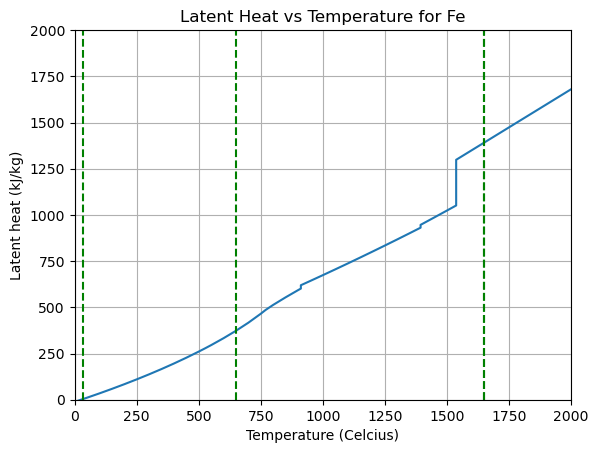

In [26]:
# Plotting Fe data
x_limit = (0, 2000)
y_limit_Fe = (0, 2000)
plt.figure(0)
plt.plot(Fe_latT, Fe_lat)
plt.axvline(x=T_inlet[0], color='green', linestyle='--', label='Rm1 inlet T')
plt.axvline(x=T_inlet[7], color='green', linestyle='--', label='Rm8 inlet T')
plt.axvline(x=T_outlet[0], color='green', linestyle='--', label='Slag T')
plt.axvline(x=T_outlet[1], color='green', linestyle='--', label='Steel T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for Fe')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_Fe)

Tin_1 = T_inlet[0]
T_values = np.array(Fe_latT)
H_values = np.array(Fe_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Tin Rm1:", H_Tin1)
Tin_2 = T_inlet[7]
T_values = np.array(Fe_latT)
H_values = np.array(Fe_lat)
idx = np.abs(T_values - Tin_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
#H_Tin2 = y0 + (y1 - y0) * (Tin_2 - x0) / (x1 - x0)
H_Tin2 = 0
print("Interpolated H2 latent @ Tin Rm8:", H_Tin2)
Tout_1 = T_outlet[0]
T_values = np.array(Fe_latT)
H_values = np.array(Fe_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)
print("Interpolated H3 latent @ Slag Temp:", H_Tout1)
Tout_2 = T_outlet[1]
T_values = np.array(Fe_latT)
H_values = np.array(Fe_lat)
idx = np.abs(T_values - Tout_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout2 = y0 + (y1 - y0) * (Tout_2 - x0) / (x1 - x0)
print("Interpolated H4 latent @ Steel Temp:", H_Tout2)
Latent_Fe = np.array([H_Tin1,H_Tin2,H_Tout1,H_Tout2])

Interpolated H1 latent @ Tin Rm1: 4.6732000000000005
Interpolated H2 latent @ Tin Rm3: 129.46
Interpolated H3 latent @ Slag Temp: 1467.66502
Interpolated H4 latent @ Dust Temp: 1271.7435


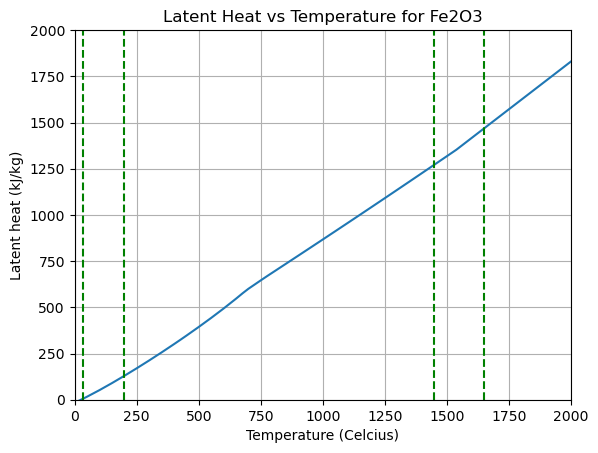

In [27]:
# Plotting Fe2O3 data
x_limit = (0, 2000)
y_limit_Fe2O3 = (0, 2000)
plt.figure(3)
plt.plot(Fe2O3_latT, Fe2O3_lat)
plt.axvline(x=T_inlet[1], color='green', linestyle='--', label='Rm2 inlet T')
plt.axvline(x=T_inlet[2], color='green', linestyle='--', label='Rm3 inlet T')
plt.axvline(x=T_outlet[0], color='green', linestyle='--', label='Slag T')
plt.axvline(x=T_outlet[2], color='green', linestyle='--', label='Dust T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for Fe2O3')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_Fe2O3)

Tin_1 = T_inlet[1]
T_values = np.array(Fe2O3_latT)
H_values = np.array(Fe2O3_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Tin Rm1:", H_Tin1)
Tin_2 = T_inlet[2]
T_values = np.array(Fe2O3_latT)
H_values = np.array(Fe2O3_lat)
idx = np.abs(T_values - Tin_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin2 = y0 + (y1 - y0) * (Tin_2 - x0) / (x1 - x0)
print("Interpolated H2 latent @ Tin Rm3:", H_Tin2)
Tout_1 = T_outlet[0]
T_values = np.array(Fe2O3_latT)
H_values = np.array(Fe2O3_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)
print("Interpolated H3 latent @ Slag Temp:", H_Tout1)
Tout_2 = T_outlet[2]
T_values = np.array(Fe2O3_latT)
H_values = np.array(Fe2O3_lat)
idx = np.abs(T_values - Tout_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout2 = y0 + (y1 - y0) * (Tout_2 - x0) / (x1 - x0)
print("Interpolated H4 latent @ Dust Temp:", H_Tout2)
Latent_Fe2O3 = np.array([H_Tin1,H_Tin2,H_Tout1,H_Tout2])

Interpolated H1 latent @ Tin Rm1: 405.88
Interpolated H2 latent @ Steel Temp: 1102.2605299999998


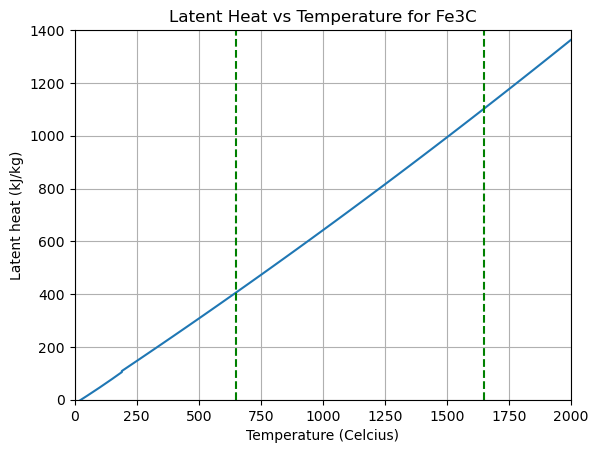

In [28]:
# Plotting Fe3C data
x_limit = (0, 2000)
y_limit_Fe3C = (0, 1400)
plt.figure(1)
plt.plot(Fe3C_latT, Fe3C_lat)
plt.axvline(x=T_inlet[0], color='green', linestyle='--', label='Rm1 inlet T')
plt.axvline(x=T_outlet[1], color='green', linestyle='--', label='Steel T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for Fe3C')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_Fe3C)

Tin_1 = T_inlet[0]
T_values = np.array(Fe3C_latT)
H_values = np.array(Fe3C_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Tin Rm1:", H_Tin1)
Tout_2 = T_outlet[1]
T_values = np.array(Fe3C_latT)
H_values = np.array(Fe3C_lat)
idx = np.abs(T_values - Tout_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout2 = y0 + (y1 - y0) * (Tout_2 - x0) / (x1 - x0)
print("Interpolated H2 latent @ Steel Temp:", H_Tout2)
Latent_Fe3C = np.array([H_Tin1,H_Tout2])

Interpolated H1 latent @ Tin Rm1: 476.37
Interpolated H2 latent @ Slag Temp: 1694.72762


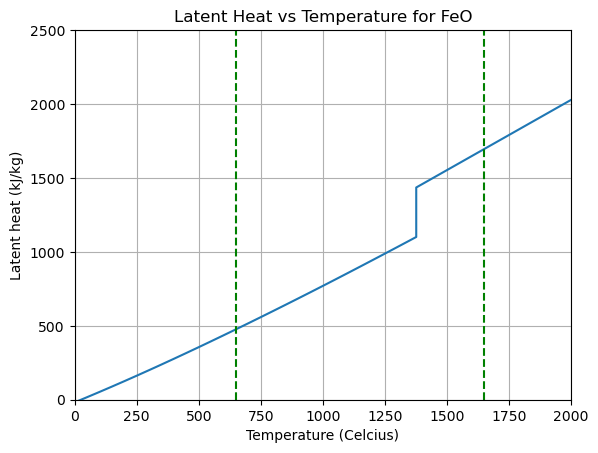

In [29]:
# Plotting FeO data
x_limit = (0, 2000)
y_limit_FeO = (0, 2500)
plt.figure(2)
plt.plot(FeO_latT, FeO_lat)
plt.axvline(x=T_inlet[0], color='green', linestyle='--', label='Rm1 inlet T')
plt.axvline(x=T_outlet[0], color='green', linestyle='--', label='Slag T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for FeO')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_FeO)

Tin_1 = T_inlet[0]
T_values = np.array(FeO_latT)
H_values = np.array(FeO_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Tin Rm1:", H_Tin1)
Tout_2 = T_outlet[0]
T_values = np.array(FeO_latT)
H_values = np.array(FeO_lat)
idx = np.abs(T_values - Tout_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout2 = y0 + (y1 - y0) * (Tout_2 - x0) / (x1 - x0)
print("Interpolated H2 latent @ Slag Temp:", H_Tout2)
Latent_FeO = np.array([H_Tin1,H_Tout2])

Interpolated H1 latent @ Tin Rm1: 671.96
Interpolated H2 latent @ Tin Rm2: 5.897599999999997
Interpolated H3 latent @ Tin Rm3: 157.38
Interpolated H4 latent @ Tin Rm4: 5.897599999999997
Interpolated H5 latent @ Tin Rm8: 5.897599999999997
Interpolated H6 latent @ Slag Temp: 1954.47996
Interpolated H7 latent @ Dust Temp: 1689.02254


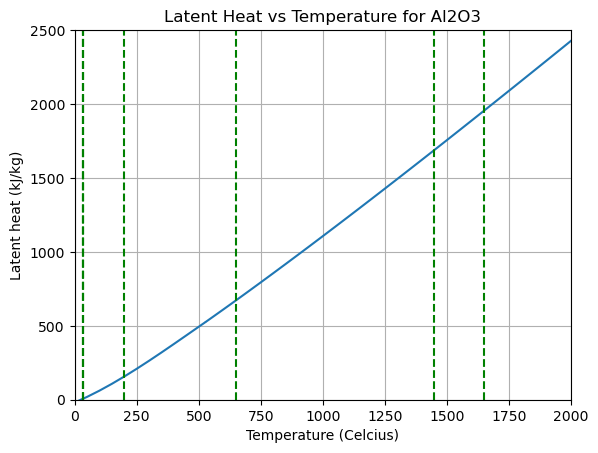

In [30]:
# Plotting Al2O3 data
x_limit = (0, 2000)
y_limit_Al2O3 = (0, 2500)
plt.figure(3)
plt.plot(Al2O3_latT, Al2O3_lat)
plt.axvline(x=T_inlet[0], color='green', linestyle='--', label='Rm1 inlet T')
plt.axvline(x=T_inlet[1], color='green', linestyle='--', label='Rm2 inlet T')
plt.axvline(x=T_inlet[2], color='green', linestyle='--', label='Rm3 inlet T')
plt.axvline(x=T_inlet[3], color='green', linestyle='--', label='Rm4 inlet T')
plt.axvline(x=T_inlet[7], color='green', linestyle='--', label='Rm8 inlet T')
plt.axvline(x=T_outlet[0], color='green', linestyle='--', label='Slag T')
plt.axvline(x=T_outlet[2], color='green', linestyle='--', label='Dust T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for Al2O3')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_Al2O3)

Tin_1 = T_inlet[0]
T_values = np.array(Al2O3_latT)
H_values = np.array(Al2O3_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)

Tin_2 = T_inlet[1]
T_values = np.array(Al2O3_latT)
H_values = np.array(Al2O3_lat)
idx = np.abs(T_values - Tin_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin2 = y0 + (y1 - y0) * (Tin_2 - x0) / (x1 - x0)

Tin_3 = T_inlet[2]
T_values = np.array(Al2O3_latT)
H_values = np.array(Al2O3_lat)
idx = np.abs(T_values - Tin_3).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin3 = y0 + (y1 - y0) * (Tin_3 - x0) / (x1 - x0)

Tin_4 = T_inlet[3]
T_values = np.array(Al2O3_latT)
H_values = np.array(Al2O3_lat)
idx = np.abs(T_values - Tin_4).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin4 = y0 + (y1 - y0) * (Tin_4 - x0) / (x1 - x0)

Tin_5 = T_inlet[7]
T_values = np.array(Al2O3_latT)
H_values = np.array(Al2O3_lat)
idx = np.abs(T_values - Tin_5).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin5 = y0 + (y1 - y0) * (Tin_5 - x0) / (x1 - x0)

Tout_1 = T_outlet[0]
T_values = np.array(Al2O3_latT)
H_values = np.array(Al2O3_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)

Tout_2 = T_outlet[2]
T_values = np.array(Al2O3_latT)
H_values = np.array(Al2O3_lat)
idx = np.abs(T_values - Tout_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout2 = y0 + (y1 - y0) * (Tout_2 - x0) / (x1 - x0)

print("Interpolated H1 latent @ Tin Rm1:", H_Tin1)
print("Interpolated H2 latent @ Tin Rm2:", H_Tin2)
print("Interpolated H3 latent @ Tin Rm3:", H_Tin3)
print("Interpolated H4 latent @ Tin Rm4:", H_Tin4)
print("Interpolated H5 latent @ Tin Rm8:", H_Tin5)
print("Interpolated H6 latent @ Slag Temp:", H_Tout1)
print("Interpolated H7 latent @ Dust Temp:", H_Tout2)
Latent_Al2O3 = np.array([H_Tin1,H_Tin2,H_Tin3,H_Tin4,H_Tin5,H_Tout1,H_Tout2])

Interpolated H1 latent @ Tin Rm1: 667.84
Interpolated H2 latent @ Tin Rm2: 5.3592
Interpolated H3 latent @ Tin Rm3: 152.13
Interpolated H4 latent @ Tin Rm4: 5.3592
Interpolated H5 latent @ Tin Rm8: 5.3592
Interpolated H6 latent @ Slag Temp: 1901.3450799999998
Interpolated H7 latent @ Dust Temp: 1655.44643


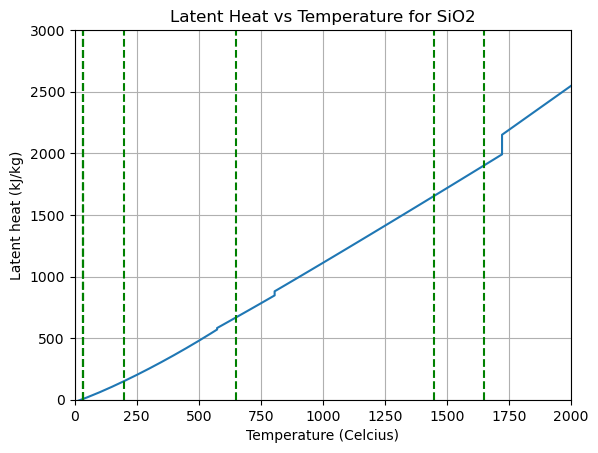

In [31]:
# Plotting SiO2 data
x_limit = (0, 2000)
y_limit_SiO2 = (0, 3000)
plt.figure(5)
plt.plot(SiO2_latT, SiO2_lat)
plt.axvline(x=T_inlet[0], color='green', linestyle='--', label='Rm1 inlet T')
plt.axvline(x=T_inlet[1], color='green', linestyle='--', label='Rm2 inlet T')
plt.axvline(x=T_inlet[2], color='green', linestyle='--', label='Rm3 inlet T')
plt.axvline(x=T_inlet[3], color='green', linestyle='--', label='Rm4 inlet T')
plt.axvline(x=T_inlet[7], color='green', linestyle='--', label='Rm8 inlet T')
plt.axvline(x=T_outlet[0], color='green', linestyle='--', label='Slag T')
plt.axvline(x=T_outlet[2], color='green', linestyle='--', label='Dust T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for SiO2')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_SiO2)

Tin_1 = T_inlet[0]
T_values = np.array(SiO2_latT)
H_values = np.array(SiO2_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)

Tin_2 = T_inlet[1]
T_values = np.array(SiO2_latT)
H_values = np.array(SiO2_lat)
idx = np.abs(T_values - Tin_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin2 = y0 + (y1 - y0) * (Tin_2 - x0) / (x1 - x0)

Tin_3 = T_inlet[2]
T_values = np.array(SiO2_latT)
H_values = np.array(SiO2_lat)
idx = np.abs(T_values - Tin_3).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin3 = y0 + (y1 - y0) * (Tin_3 - x0) / (x1 - x0)

Tin_4 = T_inlet[3]
T_values = np.array(SiO2_latT)
H_values = np.array(SiO2_lat)
idx = np.abs(T_values - Tin_4).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin4 = y0 + (y1 - y0) * (Tin_4 - x0) / (x1 - x0)

Tin_5 = T_inlet[7]
T_values = np.array(SiO2_latT)
H_values = np.array(SiO2_lat)
idx = np.abs(T_values - Tin_5).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin5 = y0 + (y1 - y0) * (Tin_5 - x0) / (x1 - x0)

Tout_1 = T_outlet[0]
T_values = np.array(SiO2_latT)
H_values = np.array(SiO2_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)

Tout_2 = T_outlet[2]
T_values = np.array(SiO2_latT)
H_values = np.array(SiO2_lat)
idx = np.abs(T_values - Tout_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout2 = y0 + (y1 - y0) * (Tout_2 - x0) / (x1 - x0)

print("Interpolated H1 latent @ Tin Rm1:", H_Tin1)
print("Interpolated H2 latent @ Tin Rm2:", H_Tin2)
print("Interpolated H3 latent @ Tin Rm3:", H_Tin3)
print("Interpolated H4 latent @ Tin Rm4:", H_Tin4)
print("Interpolated H5 latent @ Tin Rm8:", H_Tin5)
print("Interpolated H6 latent @ Slag Temp:", H_Tout1)
print("Interpolated H7 latent @ Dust Temp:", H_Tout2)
Latent_SiO2 = np.array([H_Tin1,H_Tin2,H_Tin3,H_Tin4,H_Tin5,H_Tout1,H_Tout2])

Interpolated H1 latent @ Tin Rm2: 0
Interpolated H2 latent @ Tin Rm3: 144.3
Interpolated H3 latent @ Slag Temp: 1489.05216
Interpolated H4 latent @ Dust Temp: 1293.63549


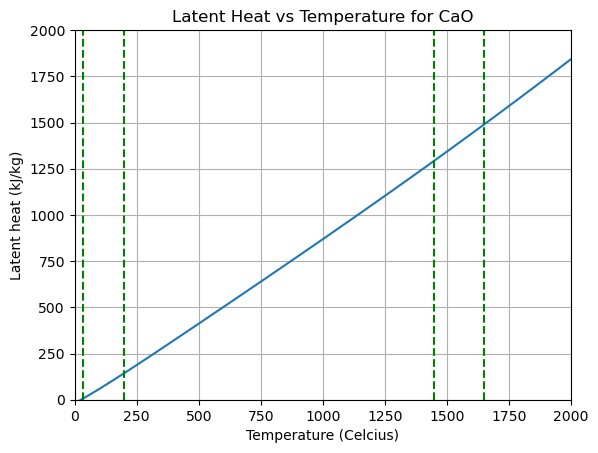

In [32]:
# Plotting CaO data
x_limit = (0, 2000)
y_limit_CaO = (0, 2000)
plt.figure(6)
plt.plot(CaO_latT, CaO_lat)
plt.axvline(x=T_inlet[1], color='green', linestyle='--', label='Rm2 inlet T')
plt.axvline(x=T_inlet[2], color='green', linestyle='--', label='Rm3 inlet T')
plt.axvline(x=T_outlet[0], color='green', linestyle='--', label='Slag T')
plt.axvline(x=T_outlet[2], color='green', linestyle='--', label='Dust T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for CaO')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_CaO)

Tin_1 = T_inlet[1]
T_values = np.array(CaO_latT)
H_values = np.array(CaO_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
#H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
H_Tin1 = 0
Tin_2 = T_inlet[2]
T_values = np.array(CaO_latT)
H_values = np.array(CaO_lat)
idx = np.abs(T_values - Tin_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin2 = y0 + (y1 - y0) * (Tin_2 - x0) / (x1 - x0)

Tout_1 = T_outlet[0]
T_values = np.array(CaO_latT)
H_values = np.array(CaO_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)

Tout_2 = T_outlet[2]
T_values = np.array(CaO_latT)
H_values = np.array(CaO_lat)
idx = np.abs(T_values - Tout_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout2 = y0 + (y1 - y0) * (Tout_2 - x0) / (x1 - x0)

print("Interpolated H1 latent @ Tin Rm2:", H_Tin1)
print("Interpolated H2 latent @ Tin Rm3:", H_Tin2)
print("Interpolated H3 latent @ Slag Temp:", H_Tout1)
print("Interpolated H4 latent @ Dust Temp:", H_Tout2)
Latent_CaO = np.array([H_Tin1,H_Tin2,H_Tout1,H_Tout2])

Interpolated H1 latent @ Tin Rm2: 5.991999999999999


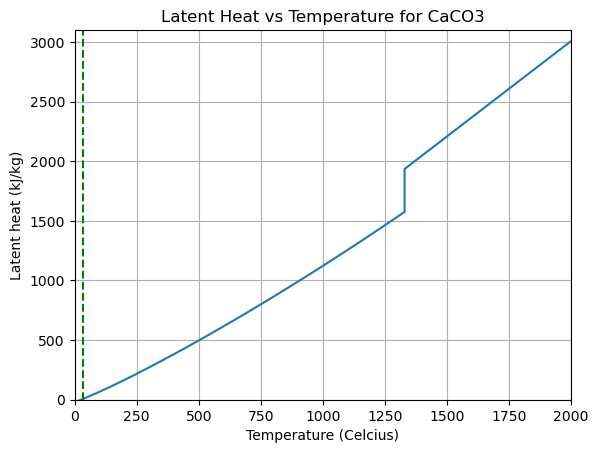

In [33]:
# Plotting CaCO3 data
x_limit = (0, 2000)
y_limit_CaCO3 = (0, 3100)
plt.figure(7)
plt.plot(CaCO3_latT, CaCO3_lat)
plt.axvline(x=T_inlet[1], color='green', linestyle='--', label='Rm2 inlet T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for CaCO3')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_CaCO3)

Tin_1 = T_inlet[1]
T_values = np.array(CaCO3_latT)
H_values = np.array(CaCO3_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Tin Rm2:", H_Tin1)
Latent_CaCO3 = np.array([H_Tin1])

Interpolated H1 latent @ Tin Rm2: 6.6304
Interpolated H2 latent @ Tin Rm3: 181.96
Interpolated H3 latent @ Slag Temp: 2034.6243499999998


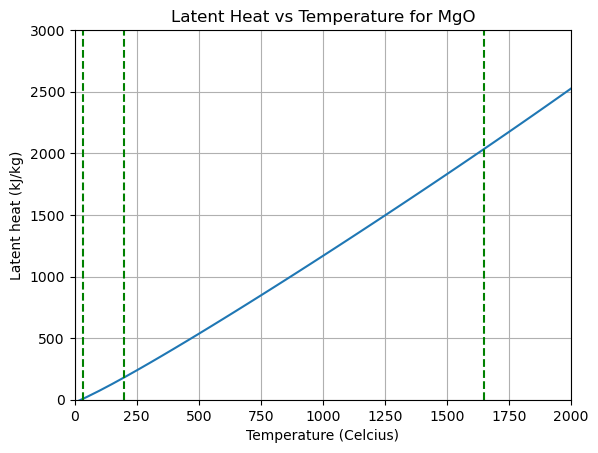

In [34]:
# Plotting MgO data
x_limit = (0, 2000)
y_limit_MgO = (0, 3000)
plt.figure(8)
plt.plot(MgO_latT, MgO_lat)
plt.axvline(x=T_inlet[1], color='green', linestyle='--', label='Rm2 inlet T')
plt.axvline(x=T_inlet[2], color='green', linestyle='--', label='Rm3 inlet T')
plt.axvline(x=T_outlet[0], color='green', linestyle='--', label='Slag T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for MgO')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_MgO)

Tin_1 = T_inlet[1]
T_values = np.array(MgO_latT)
H_values = np.array(MgO_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)

Tin_2 = T_inlet[2]
T_values = np.array(MgO_latT)
H_values = np.array(MgO_lat)
idx = np.abs(T_values - Tin_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin2 = y0 + (y1 - y0) * (Tin_2 - x0) / (x1 - x0)

Tout_1 = T_outlet[0]
T_values = np.array(MgO_latT)
H_values = np.array(MgO_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)

print("Interpolated H1 latent @ Tin Rm2:", H_Tin1)
print("Interpolated H2 latent @ Tin Rm3:", H_Tin2)
print("Interpolated H3 latent @ Slag Temp:", H_Tout1)
Latent_MgO = np.array([H_Tin1,H_Tin2,H_Tout1])

Interpolated H1 latent @ Tin Rm8: 6.37


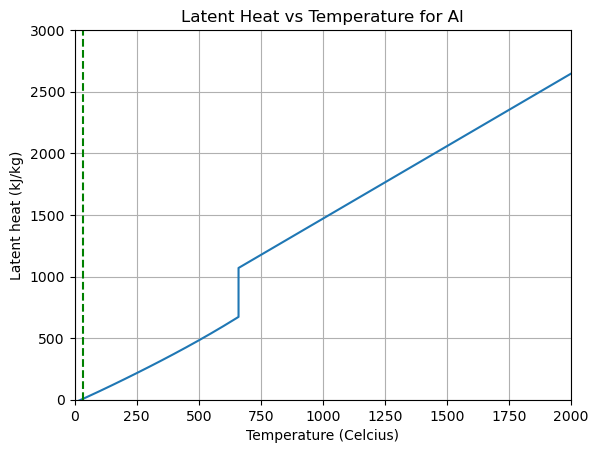

In [35]:
# Plotting Al data
x_limit = (0, 2000)
y_limit_Al = (0, 3000)
plt.figure(9)
plt.plot(Al_latT,Al_lat)
plt.axvline(x=T_inlet[7], color='green', linestyle='--', label='Rm8 inlet T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for Al')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_Al)

Tin_1 = T_inlet[7]
T_values = np.array(Al_latT)
H_values = np.array(Al_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Tin Rm8:", H_Tin1)
Latent_Al = np.array([H_Tin1])

Interpolated H1 latent @ Tin Rm8: 5.0708
Interpolated H2 latent @ Steel Temp: 3299.2647399999996


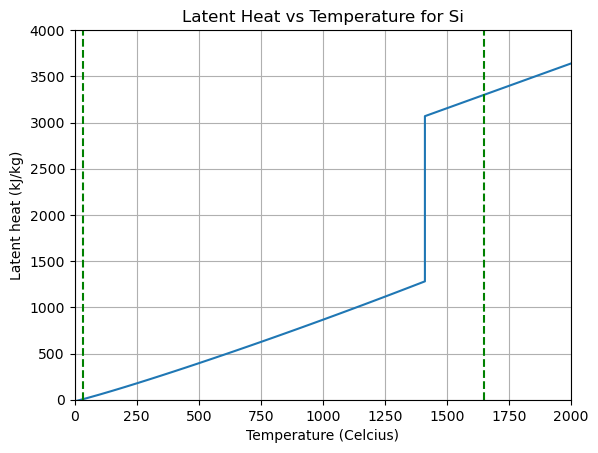

In [36]:
# Plotting Si data
x_limit = (0, 2000)
y_limit_Si = (0, 4000)
plt.figure(10)
plt.plot(Si_latT, Si_lat)
plt.axvline(x=T_inlet[7], color='green', linestyle='--', label='Rm8 inlet T')
plt.axvline(x=T_outlet[1], color='green', linestyle='--', label='Steel T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for Si')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_Si)

Tin_1 = T_inlet[7]
T_values = np.array(Si_latT)
H_values = np.array(Si_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)

Tout_1 = T_outlet[1]
T_values = np.array(Si_latT)
H_values = np.array(Si_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Tin Rm8:", H_Tin1)
print("Interpolated H2 latent @ Steel Temp:", H_Tout1)
Latent_Si = np.array([H_Tin1,H_Tout1])

Interpolated H1 latent @ Tin Rm4: 0
Interpolated H2 latent @ Tin Rm8: 0
Interpolated H3 latent @ Slag Temp: 2797.1892
Interpolated H4 latent @ Steel Temp: 2797.1892
Interpolated H5 latent @ Dust Temp: 2385.48478


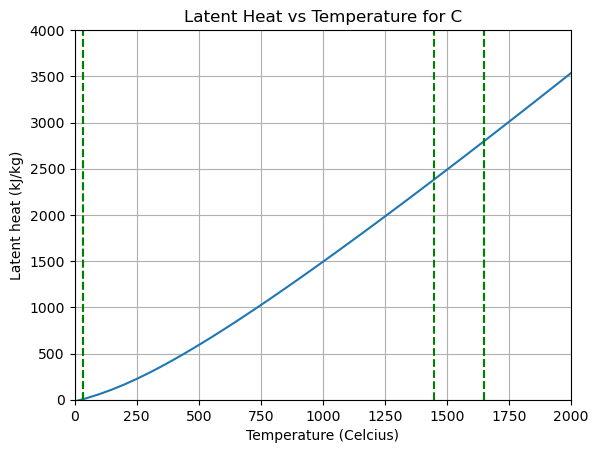

In [37]:
# Plotting C data
x_limit = (0, 2000)
y_limit_C = (0, 4000)
plt.figure(11)
plt.plot(C_latT, C_lat)
plt.axvline(x=T_inlet[3], color='green', linestyle='--', label='Rm4 inlet T')
plt.axvline(x=T_inlet[7], color='green', linestyle='--', label='Rm8 inlet T')
plt.axvline(x=T_outlet[0], color='green', linestyle='--', label='Slag T')
plt.axvline(x=T_outlet[1], color='green', linestyle='--', label='Steel T')
plt.axvline(x=T_outlet[2], color='green', linestyle='--', label='Dust T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for C')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_C)

Tin_1 = T_inlet[3]
T_values = np.array(C_latT)
H_values = np.array(C_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
#H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
H_Tin1 = 0
Tin_2 = T_inlet[7]
T_values = np.array(C_latT)
H_values = np.array(C_lat)
idx = np.abs(T_values - Tin_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
#H_Tin2 = y0 + (y1 - y0) * (Tin_2 - x0) / (x1 - x0)
H_Tin2 = 0
Tout_1 = T_outlet[0]
T_values = np.array(C_latT)
H_values = np.array(C_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)

Tout_2 = T_outlet[1]
T_values = np.array(C_latT)
H_values = np.array(C_lat)
idx = np.abs(T_values - Tout_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout2 = y0 + (y1 - y0) * (Tout_2 - x0) / (x1 - x0)

Tout_3 = T_outlet[2]
T_values = np.array(C_latT)
H_values = np.array(C_lat)
idx = np.abs(T_values - Tout_3).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout3 = y0 + (y1 - y0) * (Tout_3 - x0) / (x1 - x0)

print("Interpolated H1 latent @ Tin Rm4:", H_Tin1)
print("Interpolated H2 latent @ Tin Rm8:", H_Tin2)
print("Interpolated H3 latent @ Slag Temp:", H_Tout1)
print("Interpolated H4 latent @ Steel Temp:", H_Tout2)
print("Interpolated H5 latent @ Dust Temp:", H_Tout3)
Latent_C = np.array([H_Tin1,H_Tin2,H_Tout1,H_Tout2,H_Tout3])

Interpolated H1 latent @ Tin Rm1: 707.69
Interpolated H2 latent @ Tin Rm4: 5.1739999999999995


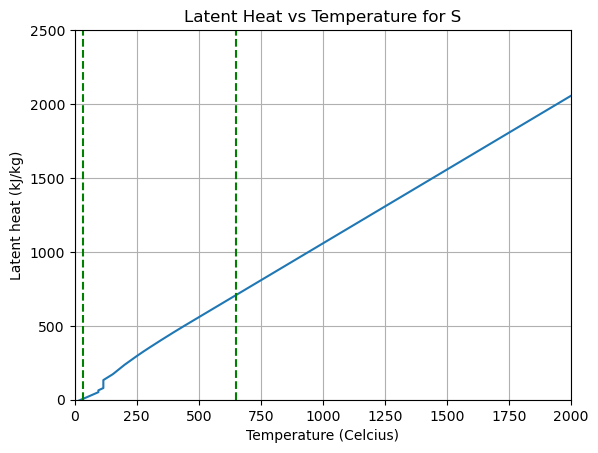

In [38]:
# Plotting S data
x_limit = (0, 2000)
y_limit_S = (0, 2500)
plt.figure(12)
plt.plot(S_latT, S_lat)
plt.axvline(x=T_inlet[0], color='green', linestyle='--', label='Rm1 inlet T')
plt.axvline(x=T_inlet[3], color='green', linestyle='--', label='Rm4 inlet T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for S')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_S)

Tin_1 = T_inlet[0]
T_values = np.array(S_latT)
H_values = np.array(S_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)

Tin_2 = T_inlet[3]
T_values = np.array(S_latT)
H_values = np.array(S_lat)
idx = np.abs(T_values - Tin_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin2 = y0 + (y1 - y0) * (Tin_2 - x0) / (x1 - x0)

print("Interpolated H1 latent @ Tin Rm1:", H_Tin1)
print("Interpolated H2 latent @ Tin Rm4:", H_Tin2)
Latent_S = np.array([H_Tin1,H_Tin2])

Interpolated H1 latent @ Tin Rm4: 13.076
Interpolated H2 latent @ Flue Gas Temp: 3280.64002


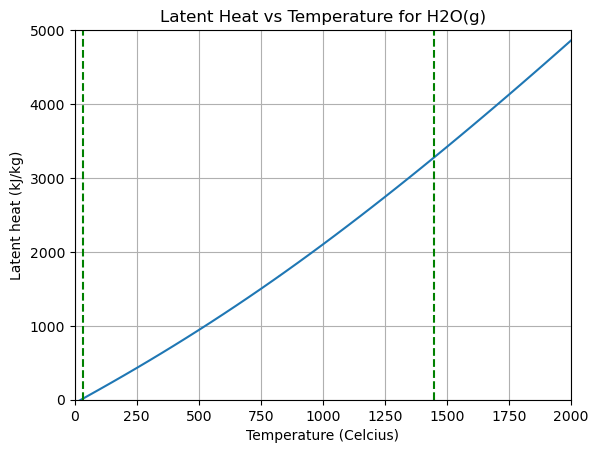

In [39]:
# Plotting H2O(g) data
x_limit = (0, 2000)
y_limit_H2O = (0, 5000)
plt.figure(13)
plt.plot(H2O_latT, H2O_lat)
plt.axvline(x=T_inlet[3], color='green', linestyle='--', label='Rm4 inlet T')
plt.axvline(x=T_outlet[3], color='green', linestyle='--', label='Flue Gas T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for H2O(g)')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_H2O)

Tin_1 = T_inlet[3]
T_values = np.array(H2O_latT)
H_values = np.array(H2O_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)

Tout_1 = T_outlet[3]
T_values = np.array(H2O_latT)
H_values = np.array(H2O_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)

print("Interpolated H1 latent @ Tin Rm4:", H_Tin1)
print("Interpolated H2 latent @ Flue Gas Temp:", H_Tout1)
Latent_H2O = np.array([H_Tin1,H_Tout1])

Interpolated H1 latent @ Tin Rm5: 0.0049999999999954525
Interpolated H2 latent @ Flue Gas Temp: 1650.77055


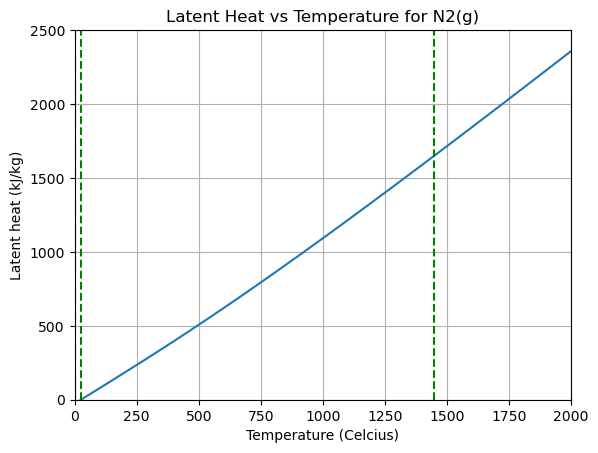

In [40]:
# Plotting N2(g) data
x_limit = (0, 2000)
y_limit_N2 = (0, 2500)
plt.figure(14)
plt.plot(N2_latT, N2_lat)
plt.axvline(x=T_inlet[4], color='green', linestyle='--', label='Rm5 inlet T')
plt.axvline(x=T_outlet[3], color='green', linestyle='--', label='Flue Gas T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for N2(g)')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_N2)

Tin_1 = T_inlet[4]
T_values = np.array(N2_latT)
H_values = np.array(N2_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)

Tout_1 = T_outlet[3]
T_values = np.array(N2_latT)
H_values = np.array(N2_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)

print("Interpolated H1 latent @ Tin Rm5:", H_Tin1)
print("Interpolated H2 latent @ Flue Gas Temp:", H_Tout1)
Latent_N2 = np.array([H_Tin1,H_Tout1])

Interpolated H1 latent @ Tin Rm6: 0


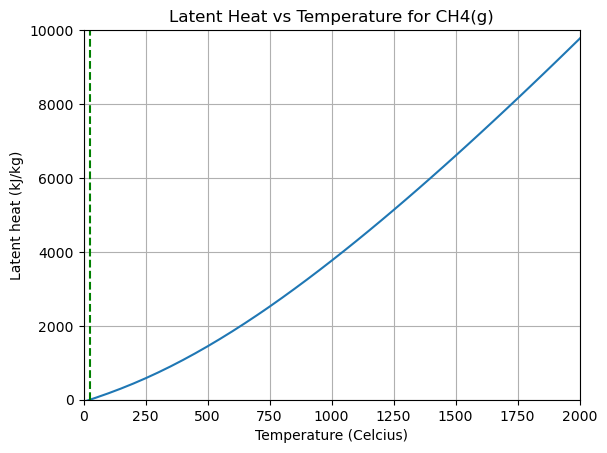

In [41]:
# Plotting CH4(g) data
x_limit = (0, 2000)
y_limit_CH4 = (0, 10000)
plt.figure(15)
plt.plot(CH4_latT, CH4_lat)
plt.axvline(x=T_inlet[5], color='green', linestyle='--', label='Rm6 inlet T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for CH4(g)')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_CH4)

Tin_1 = T_inlet[5]
T_values = np.array(CH4_latT)
H_values = np.array(CH4_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
#H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
H_Tin1 = 0
print("Interpolated H1 latent @ Tin Rm6:", H_Tin1)
Latent_CH4 = np.array([H_Tin1])

Interpolated H1 latent @ Tin Rm5: 0
Interpolated H2 latent @ Tin Rm7: 0


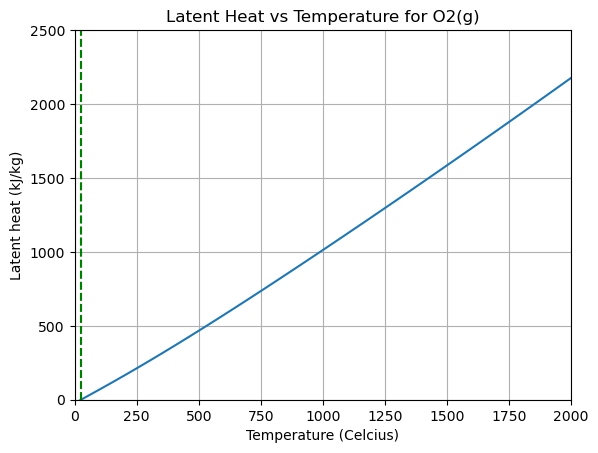

In [42]:
# Plotting O2(g) data
x_limit = (0, 2000)
y_limit_O2 = (0, 2500)
plt.figure(16)
plt.plot(O2_latT, O2_lat)
plt.axvline(x=T_inlet[4], color='green', linestyle='--', label='Rm5 inlet T')
plt.axvline(x=T_inlet[6], color='green', linestyle='--', label='Rm7 inlet T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for O2(g)')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_O2)

Tin_1 = T_inlet[4]
T_values = np.array(O2_latT)
H_values = np.array(O2_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
#H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
H_Tin1 = 0
Tin_2 = T_inlet[6]
T_values = np.array(O2_latT)
H_values = np.array(O2_lat)
idx = np.abs(T_values - Tin_2).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
#H_Tin2 = y0 + (y1 - y0) * (Tin_2 - x0) / (x1 - x0)
H_Tin2 = 0
print("Interpolated H1 latent @ Tin Rm5:", H_Tin1)
print("Interpolated H2 latent @ Tin Rm7:", H_Tin1)
Latent_O2 = np.array([H_Tin1,H_Tin2])

Interpolated H1 latent @ Tin Rm8: 0


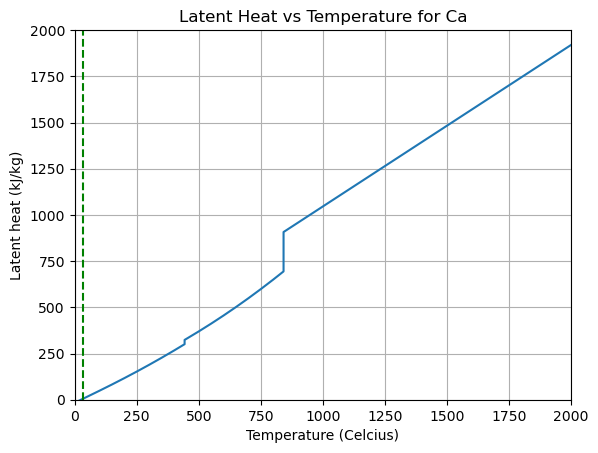

In [43]:
# Plotting Ca data
x_limit = (0, 2000)
y_limit_Ca = (0, 2000)
plt.figure(17)
plt.plot(Ca_latT, Ca_lat)
plt.axvline(x=T_inlet[7], color='green', linestyle='--', label='Rm8 inlet T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for Ca')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_Ca)

Tin_1 = T_inlet[7]
T_values = np.array(Ca_latT)
H_values = np.array(Ca_lat)
idx = np.abs(T_values - Tin_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
#H_Tin1 = y0 + (y1 - y0) * (Tin_1 - x0) / (x1 - x0)
H_Tin1 = 0
print("Interpolated H1 latent @ Tin Rm8:", H_Tin1)
Latent_Ca = np.array([H_Tin1])

Interpolated H1 latent @ Flue Gas Temp: 1669.45875


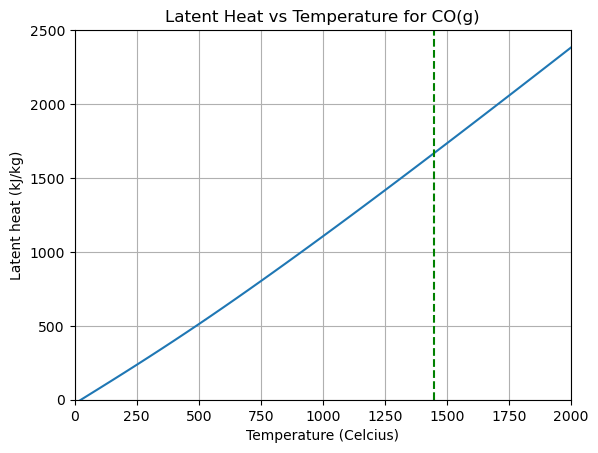

In [44]:
# Plotting CO(g) data
x_limit = (0, 2000)
y_limit_CO = (0, 2500)
plt.figure(18)
plt.plot(CO_latT, CO_lat)
plt.axvline(x=T_outlet[3], color='green', linestyle='--', label='Flue Gas T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for CO(g)')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_CO)

Tout_1 = T_outlet[3]
T_values = np.array(CO_latT)
H_values = np.array(CO_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Flue Gas Temp:", H_Tout1)
Latent_CO = np.array([H_Tout1])

Interpolated H1 latent @ Flue Gas Temp: 1633.78867


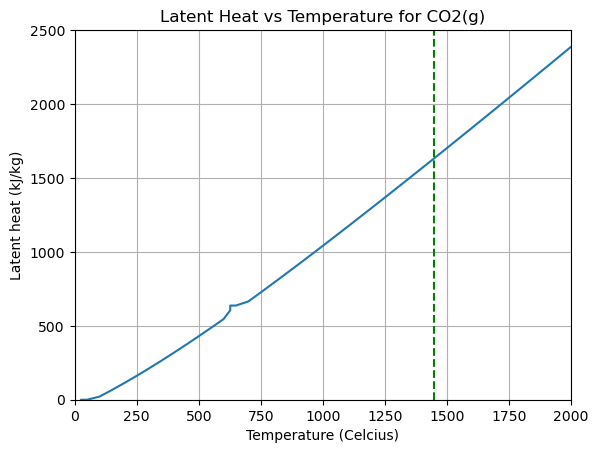

In [45]:
# Plotting CO2(g) data
x_limit = (0, 2000)
y_limit_CO2 = (0, 2500)
plt.figure(19)
plt.plot(CO2_latT, CO2_lat)
plt.axvline(x=T_outlet[3], color='green', linestyle='--', label='Flue Gas T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for CO2(g)')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_CO2)

Tout_1 = T_outlet[3]
T_values = np.array(CO2_latT)
H_values = np.array(CO2_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Flue Gas Temp:", H_Tout1)
Latent_CO2 = np.array([H_Tout1])

Interpolated H1 latent @ Slag Temp: 1247.31079


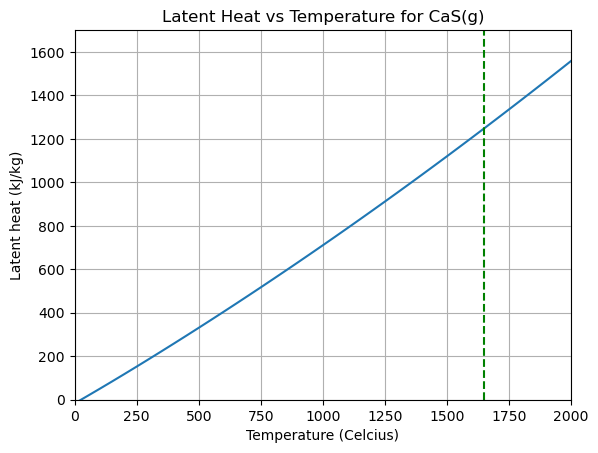

In [46]:
# Plotting CaS data
x_limit = (0, 2000)
y_limit_CaS = (0, 1700)
plt.figure(20)
plt.plot(CaS_latT, CaS_lat)
plt.axvline(x=T_outlet[0], color='green', linestyle='--', label='Slag T')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Latent heat (kJ/kg)')
plt.title('Latent Heat vs Temperature for CaS(g)')
plt.grid(True)
plt.xlim(x_limit)
plt.ylim(y_limit_CaS)

Tout_1 = T_outlet[0]
T_values = np.array(CaS_latT)
H_values = np.array(CaS_lat)
idx = np.abs(T_values - Tout_1).argsort()[:2]
x0, x1 = T_values[idx]
y0, y1 = H_values[idx]
H_Tout1 = y0 + (y1 - y0) * (Tout_1 - x0) / (x1 - x0)
print("Interpolated H1 latent @ Slag Temp:", H_Tout1)
Latent_CaS = np.array([H_Tout1])

### Energy balances over individual scpecies 

### Heat of formation of he individual species

In [88]:
Stream1_mass = np.array([m_rm1[0],m_rm1[1],m_rm1[2],m_rm1[4],m_rm1[5],m_rm1[12]])
Stream1_latent = np.array([Latent_Fe[0],Latent_Fe3C[0],Latent_FeO[0],Latent_Al2O3[0],Latent_SiO2[0],Latent_S[0]])
Stream1_formation = np.array([Hfm[0], Hfm[1], Hfm[2], Hfm[4], Hfm[5], Hfm[12]])
E1 = np.sum(Stream1_mass*Stream1_latent) + np.sum(Stream1_mass*Stream1_formation)
print('Enthalphy of stream 1 = ', E1, 'kWh')

Stream2_mass = np.array([m_rm2[3],m_rm2[4],m_rm2[5],m_rm2[6],m_rm2[7],m_rm2[8]])
Stream2_latent = np.array([Latent_Fe2O3[0],Latent_Al2O3[1],Latent_SiO2[1],Latent_CaO[0],Latent_CaCO3[0],Latent_MgO[0]])
Stream2_formation = np.array([Hfm[3], Hfm[4], Hfm[5], Hfm[6], Hfm[7], Hfm[8]])
E2 = np.sum(Stream2_mass*Stream2_latent) + np.sum(Stream2_mass*Stream2_formation)
print('Enthalphy of stream 2 = ', E2, 'kWh')

Stream3_mass = np.array([m_rm3[3],m_rm3[4],m_rm3[5],m_rm3[6],m_rm3[8]])
Stream3_latent = np.array([Latent_Fe2O3[1],Latent_Al2O3[2],Latent_SiO2[2],Latent_CaO[1],Latent_MgO[1]])
Stream3_formation = np.array([Hfm[3], Hfm[4], Hfm[5], Hfm[6], Hfm[8]])
E3 = np.sum(Stream3_mass*Stream3_latent) + np.sum(Stream3_mass*Stream3_formation)
print('Enthalphy of stream 3 = ', E3, 'kWh')

Stream4_mass = np.array([m_rm4[4],m_rm4[5],m_rm4[11],m_rm4[12],m_rm4[13]])
Stream4_latent = np.array([Latent_Al2O3[3],Latent_SiO2[3],Latent_C[0],Latent_S[1],Latent_H2O[0]])
Stream4_formation = np.array([Hfm[4], Hfm[5], Hfm[11], Hfm[12], Hfm[13]])
E4 = np.sum(Stream4_mass*Stream4_latent) + np.sum(Stream4_mass*Stream4_formation)
print('Enthalphy of stream 4 = ', E4, 'kWh')

Stream5_mass = np.array([m_rm5[14],m_rm5[16]])
Stream5_latent = np.array([Latent_N2[0],Latent_O2[0]])
### Pure elements no heat of formation associated
E5 = np.sum(Stream5_mass*Stream5_latent)
print('Enthalphy of stream 5 = ', E5, 'kWh')

Stream6_mass = np.array([m_rm6[15]])
Stream6_latent = np.array([Latent_CH4[0]])
Stream6_formation = np.array([Hfm[15]])
E6 = np.sum(Stream6_mass*Stream6_latent) + np.sum(Stream6_mass*Stream6_formation)
print('Enthalphy of stream 6 = ', E6, 'kWh')

Stream7_mass = np.array([m_rm7[16]])
Stream7_latent = np.array([Latent_O2[1]])
### Pure elements no heat of formation associated
E7 = np.sum(Stream7_mass*Stream7_latent)
print('Enthalphy of stream 7 = ', E7, 'kWh')

Stream8_mass = np.array([m_rm8[0],m_rm8[4],m_rm8[5],m_rm8[9],m_rm8[10],m_rm8[11],m_rm8[17]])
Stream8_latent = np.array([Latent_Fe[1],Latent_Al2O3[4],Latent_SiO2[4],Latent_Al[0],Latent_Si[0],Latent_C[1],Latent_Ca[0]])
Stream8_formation = np.array([Hfm[0], Hfm[4], Hfm[5], Hfm[9], Hfm[10], Hfm[11], Hfm[17]])
E8 = np.sum(Stream8_mass*Stream8_latent) + np.sum(Stream8_mass*Stream8_formation)
print('Enthalphy of stream 8 = ', E8, 'kWh')

Slag_mass = np.array([S_Fe,S_FeO,S_Fe2O3,S_Al2O3,S_SiO2,S_CaO,S_MgO,S_C,S_CaS])
Slag_latent = np.array([Latent_Fe[2],Latent_FeO[1],Latent_Fe2O3[2],Latent_Al2O3[5],Latent_SiO2[5],Latent_CaO[2],Latent_MgO[2],Latent_C[2],Latent_CaS[0]])
Slag_formation = np.array([Hfm[0], Hfm[2], Hfm[3], Hfm[4], Hfm[5], Hfm[6], Hfm[8], Hfm[11], Hfm[20]])
E_Slag = np.sum(Slag_mass*Slag_latent) + np.sum(Slag_mass*Slag_formation)
print('Enthalphy of stream E_Slag = ', E_Slag, 'kWh')

Steel_mass = np.array([LS_Fe,LS_Fe3C,LS_Si,LS_C])
Steel_latent = np.array([Latent_Fe[3],Latent_Fe3C[1],Latent_Si[1],Latent_C[3]])
Steel_formation = np.array([Hfm[0], Hfm[2], Hfm[10], Hfm[11]])
E_Steel = np.sum(Steel_mass*Steel_latent) + np.sum(Steel_mass*Steel_formation)
print('Enthalphy of stream E_Steel = ',E_Steel, 'kWh')

Dust_mass = np.array([D_Fe2O3,D_Al2O3,D_SiO2,D_CaO,D_C])
Dust_latent = np.array([Latent_Fe2O3[3],Latent_Al2O3[6],Latent_SiO2[6],Latent_CaO[3],Latent_C[4]])
Dust_formation = np.array([Hfm[3], Hfm[4], Hfm[5], Hfm[6], Hfm[11]])
E_Dust = np.sum(Dust_mass*Dust_latent) + np.sum(Dust_mass*Dust_formation)
print('Enthalphy of stream E_Dust = ',E_Dust, 'kWh')

FlueGas_mass = np.array([FG_H2O,FG_N2,FG_CO,FG_CO2])
FlueGas_latent = np.array([Latent_H2O[1],Latent_N2[1],Latent_CO[0],Latent_CO2[0]])
FlueGas_formation = np.array([Hfm[13], Hfm[14], Hfm[18], Hfm[19]])
E_FlueGas = np.sum(FlueGas_mass*FlueGas_latent) + np.sum(FlueGas_mass*FlueGas_formation)
print('Enthalphy of stream E_FlueGas = ', E_FlueGas, 'kWh')

Energy_in = E1+E2+E3+E4+E5+E6+E7+E8
Energy_out = E_Slag+E_Steel+E_Dust+E_FlueGas
print("Energy associated with feed Streams = ", Energy_in, "kJ/hr")
print("Energy associated with outlet streams = ", Energy_out, "kJ/hr")
print("Additional to be supplied = ", Energy_out - Energy_in, "kJ/hr")

Enthalphy of stream 1 =  -910882.602189576 kWh
Enthalphy of stream 2 =  -221169.48407762492 kWh
Enthalphy of stream 3 =  -38201.66990635584 kWh
Enthalphy of stream 4 =  -29741.911457775936 kWh
Enthalphy of stream 5 =  0.5752499999994768 kWh
Enthalphy of stream 6 =  -18603.49127182045 kWh
Enthalphy of stream 7 =  0.0 kWh
Enthalphy of stream 8 =  -481.60834258525443 kWh
Enthalphy of stream E_Slag =  -1019377.9887656062 kWh
Enthalphy of stream E_Steel =  1129364.0102633624 kWh
Enthalphy of stream E_Dust =  -543232.2834260672 kWh
Enthalphy of stream E_FlueGas =  -483600.9470150121 kWh
Energy associated with feed Streams =  -1219080.1919957383 kJ/hr
Energy associated with outlet streams =  -916847.208943323 kJ/hr
Additional to be supplied =  302232.9830524153 kJ/hr
